In [1]:
#libration.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 10 January 2018.
#simulate a narrow eccentric ringlet that librates around equilibrium

In [2]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

In [3]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, lambda0 = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)

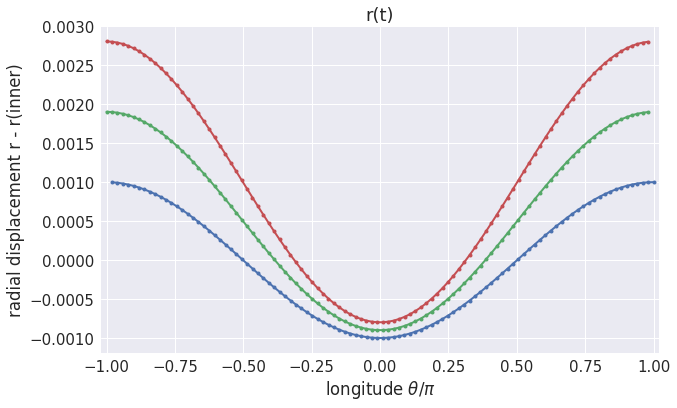

In [4]:
#check initial r(theta)
tidx = 0
r0 = r[tidx]
t0 = t[tidx]
f, ax = plt.subplots(figsize=(10, 6))
for pidx in range(number_of_streamlines):
    x = t0[pidx, :]/np.pi
    y = r0[pidx, :] - r0[0, :].mean()
    ax.plot(x, y, marker='o', markersize=4, linestyle='-', linewidth=2)
p = ax.set_xlim(-1.02, 1.02)
p = ax.set_title('r(t)')
p = ax.set_xlabel(r'longitude $\theta/\pi$')
p = ax.set_ylabel('radial displacement r - r(inner)')

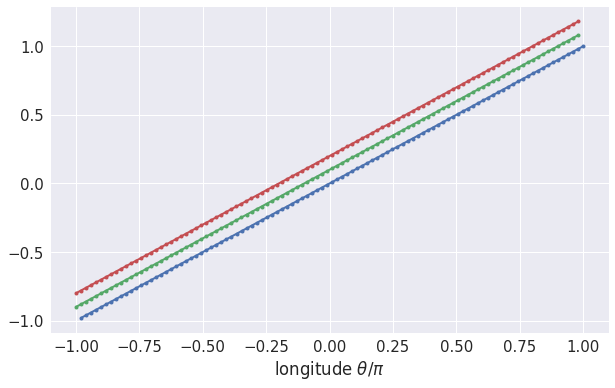

In [5]:
#check each streamline's intial t
tidx = 0
t0 = t[tidx]
f, ax = plt.subplots(figsize=(10, 6))
for pidx in range(number_of_streamlines):
    x = t0[pidx]/np.pi
    ax.plot(x, x + 0.1*pidx, marker='o', markersize=4, linestyle='-', linewidth=2)
p = ax.set_xlim(-1.1, 1.1)
p = ax.set_xlabel(r'longitude $\theta/\pi$')

In [6]:
#calculate delta_wt and delta_e versus time
delta_wt = []
delta_e = []
for tidx in range(len(times)):
    r0 = r[tidx]
    r_inner = r0[0]
    r_outer = r0[-1]
    pidx_inner = r_inner.argmin()
    pidx_outer = r_outer.argmin()
    wt0 = wt[tidx]
    wt_inner = wt0[0]
    wt_outer = wt0[-1]
    dwt = wt_outer[pidx_outer] - wt_inner[pidx_inner]
    if (dwt > np.pi):
        dwt -= 2*np.pi
    if (dwt < -np.pi):
        dwt += 2*np.pi
    delta_wt += [dwt]
    e0 = e[tidx]
    e_inner = e0[0]
    e_outer = e0[-1]
    de = e_outer[pidx_outer] - e_inner[pidx_inner]
    #a0 = e[tidx]
    #a_inner = a0[0]
    #a_outer = a0[-1]
    #da = a_outer[pidx_outer] - a_inner[pidx_inner]
    delta_e += [de]

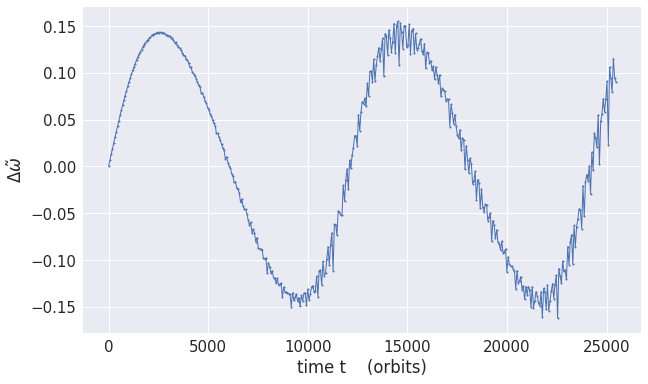

In [7]:
#plot delta_wt versus time
x = times/(2*np.pi)
y = delta_wt
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, marker='o', markersize=2, linestyle='-', linewidth=1)
p = ax.set_xlabel('time t    (orbits)')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$')

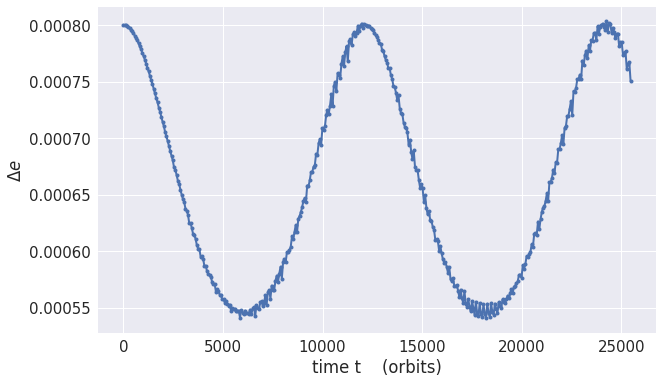

In [8]:
#plot delta_e versus time
x = times/(2*np.pi)
y = delta_e
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, marker='o', markersize=4, linestyle='-', linewidth=2)
p = ax.set_xlabel('time t    (orbits)')
p = ax.set_ylabel(r'$\Delta e$')

In [9]:
#check angular momentum conservation
mass = lambda0*2*np.pi*a[0]/particles_per_streamline
print 'total ring mass = ', mass.sum()
ang_mom = []
for tidx in range(len(times)):
    l = (mass*(r[tidx]*vt[tidx])).sum()
    ang_mom += [l]
ang_mom = np.array(ang_mom)
delta_ang_mom = np.abs(ang_mom - ang_mom[0])/ang_mom[0]
print 'max fractional change in angular momentum = ', delta_ang_mom.max()

total ring mass =  1.00000000002e-10
max fractional change in angular momentum =  6.43666530376e-16


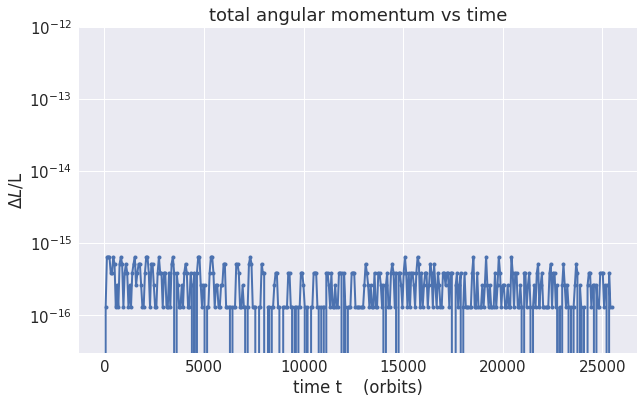

In [10]:
#plot delta_ang_mom versus time
x = times/(2*np.pi)
y = delta_ang_mom
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y, marker='o', markersize=4, linestyle='-', linewidth=2)
p = ax.set_title('total angular momentum vs time')
p = ax.set_xlabel('time t    (orbits)')
p = ax.set_ylabel(r'$\Delta L$/L')
p = ax.set_ylim(3.0e-17, 1.0e-12)
p = ax.set_yscale('log')